In [1]:
pip install transformers torch pillow einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 11.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Install pyvips for faster image processing
!pip install pyvips-binary pyvips


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [14]:
import torch
import os

In [6]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [19]:
!pip install accelerate


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [11]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [ ]:
# # reference from website
# from transformers import AutoModelForCausalLM, AutoTokenizer
# from PIL import Image

# # Load the model

# model = AutoModelForCausalLM.from_pretrained(
# "vikhyatk/moondream2",
# revision="2025-01-09",
# trust_remote_code=True, # Uncomment for GPU acceleration & pip install accelerate # device_map={"": "cuda"}
# )

# # Load your image
# image_path = "/Users/elisaxia/Documents/MIT/Junior Year 2024-25/2025 Spring/6.7930/neonatal-mlhc/dataloader/testing_data/1.22.25_sc1_frame_3.jpg"
# image = Image.open(image_path)

# # 1. Image Captioning

# print("Short caption:")
# print(model.caption(image, length="short")["caption"])

# print("Detailed caption:")
# for t in model.caption(image, length="normal", stream=True)["caption"]:
#     print(t, end="", flush=True)

# # 2. Visual Question Answering

# print("Asking questions about the image:")
# print(model.query(image, "How many people are in the image?")["answer"])

# # 3. Object Detection

# print("Detecting objects:")
# objects = model.detect(image, "face")["objects"]
# print(f"Found {len(objects)} face(s)")

# # 4. Visual Pointing

# print("Locating objects:")
# points = model.point(image, "person")["points"]
# print(f"Found {len(points)} person(s)")

Short caption:


KeyboardInterrupt: 

In [20]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image
import torch
import os

# Check for MPS (Apple Silicon GPU) availability
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Check if image exists
image_path = "../../dataloader/testing_data/1.22.25_sc1_frame_3.jpg"
if not os.path.exists(image_path):
    print(f"Warning: Image not found at {image_path}")
    image_dir = "../../dataloader/testing_data/"
    if os.path.exists(image_dir):
        print(f"Files in directory: {os.listdir(image_dir)}")

# Load the model with MPS acceleration - approach 1
try:
    print("Loading model with device mapping...")
    model = AutoModelForCausalLM.from_pretrained(
        "vikhyatk/moondream2",
        revision="2025-01-09",
        trust_remote_code=True, 
        device_map={"": device}  # Use MPS device
    )
    print(f"Model loaded successfully on {device}!")
except Exception as e:
    print(f"Error using device_map: {str(e)}")
    print("Falling back to default loading without device mapping...")
    
    # Alternative approach without device_map
    model = AutoModelForCausalLM.from_pretrained(
        "vikhyatk/moondream2",
        revision="2025-01-09",
        trust_remote_code=True
    )
    
    # Manually move model to device after loading
    try:
        model = model.to(device)
        print(f"Successfully moved model to {device}")
    except Exception as e:
        print(f"Error moving model to {device}: {str(e)}")
        print("Using model on CPU")
        
print("Model loaded!")

Using device: mps
Loading model with device mapping...
Error using device_map: Using a `device_map` or `tp_plan` requires `accelerate`. You can install it with `pip install accelerate`
Falling back to default loading without device mapping...
Successfully moved model to mps
Model loaded!


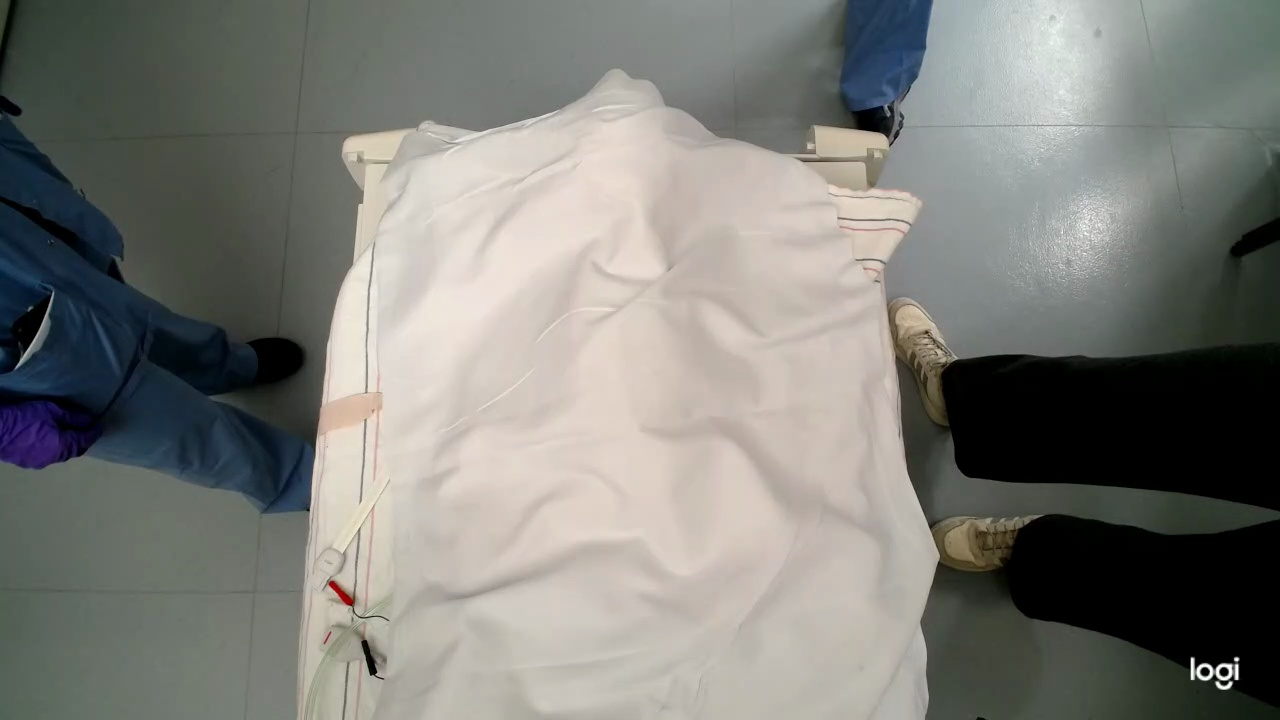

Short caption:
 A white medical bed with a red and white striped blanket is positioned in a hospital room, with two individuals in blue and black attire nearby.

Detailed caption:
 The image shows a white medical bed with a white sheet and a red and white striped blanket or cover. The bed is positioned on a light gray floor, with a portion of a person wearing a blue jacket and a purple garment visible in the top left corner. Another person wearing black pants and tan shoes is visible in the bottom right corner. The image is taken from a low angle, looking up at the bed and the people.



In [21]:
# Load your image
image = Image.open(image_path)
# Display the image in the notebook
display(image)

# 1. Image Captioning
print("Short caption:")
print(model.caption(image, length="short")["caption"])

print("\nDetailed caption:")
for t in model.caption(image, length="normal", stream=True)["caption"]:
    print(t, end="", flush=True)
print("\n")

In [22]:
# 2. Visual Question Answering
print("Asking questions about the image:")

questions = [
    "What medical equipment is visible in the image?",
    "Is there any medical procedure being performed?",
    "How many people are in the image?"
]

for question in questions:
    print(f"\nQuestion: {question}")
    answer = model.query(image, question)["answer"]
    print(f"Answer: {answer}")

Asking questions about the image:

Question: What medical equipment is visible in the image?
Answer:  In the image, a medical bed is visible, and there are wires connected to it.

Question: Is there any medical procedure being performed?
Answer:  Yes, there is a medical procedure being performed, as evidenced by the presence of wires connected to the patient's body.

Question: How many people are in the image?
Answer:  There are three people in the image.


In [23]:
# 3. Object Detection
print("\nDetecting objects:")
for obj_type in ["medical equipment", "face", "hands"]:
    objects = model.detect(image, obj_type)["objects"]
    print(f"Found {len(objects)} {obj_type}")
    if objects:
        print(f"  Details: {objects}")


Detecting objects:
Found 1 medical equipment
  Details: [{'x_min': 0.2373046875, 'y_min': 0.107421875, 'x_max': 0.7255859375, 'y_max': 1.0}]
Found 0 face
Found 0 hands


In [24]:
# 4. Visual Pointing
print("\nLocating objects:")
for obj_type in ["person", "medical device"]:
    points = model.point(image, obj_type)["points"]
    print(f"Found {len(points)} {obj_type}")
    if points:
        print(f"  Locations: {points}")


Locating objects:
Found 3 person
  Locations: [{'x': 0.072265625, 'y': 0.42578125}, {'x': 0.68359375, 'y': 0.0615234375}, {'x': 0.8876953125, 'y': 0.5498046875}]
Found 1 medical device
  Locations: [{'x': 0.2744140625, 'y': 0.818359375}]
